<a href="https://colab.research.google.com/github/rootprime/GRU/blob/main/Airlines_GRU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This code is a Python script for time series forecasting using a GRU (Gated Recurrent Unit) neural network model. Here's a breakdown of what each part of the code does:

1. **Importing Libraries**:
   - `numpy` (as `np`): For numerical operations.
   - `pandas` (as `pd`): For data manipulation and analysis.
   - `matplotlib.pyplot` (as `plt`): For data visualization.
   - `MinMaxScaler` from `sklearn.preprocessing`: For scaling data.
   - `Sequential`, `Dense`, `GRU`, and `Dropout` from `tensorflow.keras.models` and `tensorflow.keras.layers`: For building the neural network model.

2. **Loading and Preprocessing Data**:
   - Reads the dataset from an Excel file called 'airline-passengers.xlsx'.
   - Plots the time series data of international airline passengers.
   - Reshapes and scales the data using `MinMaxScaler` to be between 0 and 1.
   - Splits the data into training and testing sets.

3. **Creating Dataset**:
   - Defines a function `create_dataset` to create input-output pairs for the model.
   - Creates input sequences and their corresponding output values with a given window size.

4. **Building the Neural Network Model**:
   - Creates a sequential model using `Sequential`.
   - Adds four GRU layers with dropout regularization to prevent overfitting.
   - The GRU layers have increasing numbers of units and use ReLU activation functions.
   - The last layer is a fully connected (`Dense`) layer with one unit.
   - Compiles the model using the Adam optimizer and mean squared error loss function.

5. **Training the Model**:
   - Fits the model to the training data for a specified number of epochs and batch size.
   - The training loss history is stored for later visualization.

6. **Plotting Training Loss**:
   - Plots the training loss over epochs to visualize the model's training progress.

7. **Making Predictions**:
   - Uses the trained model to predict values for both the training and testing data.
   - Inverse scales the predicted values back to their original scale.

8. **Plotting Predictions**:
   - Plots the actual and predicted values of the testing data to visualize the model's performance.

Overall, this code demonstrates the process of building, training, and evaluating a GRU-based neural network model for time series forecasting.

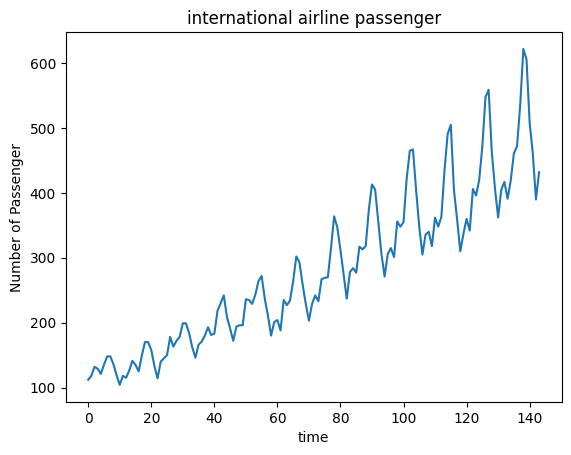

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_4 (GRU)                 (None, 1, 30)             2970      
                                                                 
 dropout_4 (Dropout)         (None, 1, 30)             0         
                                                                 
 gru_5 (GRU)                 (None, 1, 40)             8640      
                                                                 
 dropout_5 (Dropout)         (None, 1, 40)             0         
                                                                 
 gru_6 (GRU)                 (None, 1, 50)             13800     
                                                                 
 dropout_6 (Dropout)         (None, 1, 50)             0         
                                                                 
 gru_7 (GRU)                 (None, 70)               

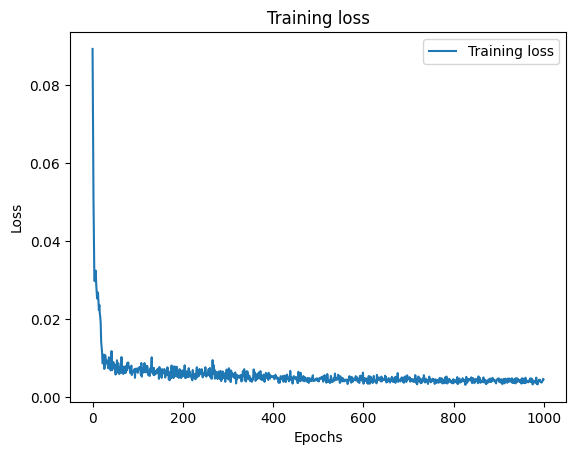

1/1 [==============================] - 0s 18ms/step


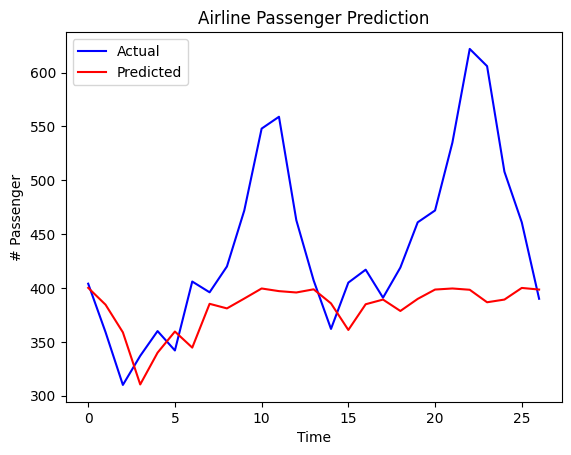

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU, Dropout

# Load the dataset
data = pd.read_excel('airline-passengers.xlsx')  # Read data from an Excel file
data.head()  # Display the first few rows of the dataset

# Plot the time series data
plt.plot(data.iloc[:,1].values)
plt.xlabel("time")
plt.ylabel("Number of Passenger")
plt.title("international airline passenger")
plt.show()

# Preprocess the data
data = data['Passengers'].values.reshape(-1, 1)  # Reshape the data for MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))  # Initialize MinMaxScaler
data = scaler.fit_transform(data)  # Scale the data between 0 and 1

# Split the data into training and testing sets
train_data = data[:int(len(data)*0.8)]  # 80% of the data for training
test_data = data[int(len(data)*0.8):]   # 20% of the data for testing

# Define a function to create input-output pairs for the model
def create_dataset(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size - 1):
        X.append(data[i:(i + window_size), 0])  # Input sequence
        y.append(data[i + window_size, 0])       # Output value
    return np.array(X), np.array(y)

window_size = 1  # Define the window size for input sequences

# Create input-output pairs for training and testing data
X_train, y_train = create_dataset(train_data, window_size)
X_test, y_test = create_dataset(test_data, window_size)

# Reshape the input data for compatibility with GRU layers
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

# Build the GRU model
model = Sequential()  # Initialize a sequential model
model.add(GRU(units=30, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], 1)))  # Add a GRU layer with 30 units
model.add(Dropout(rate=0.2))  # Add dropout regularization

model.add(GRU(units=40, activation='relu', return_sequences=True))  # Add another GRU layer with 40 units
model.add(Dropout(rate=0.3))  # Add dropout regularization

model.add(GRU(units=50, activation='relu', return_sequences=True))  # Add another GRU layer with 50 units
model.add(Dropout(rate=0.4))  # Add dropout regularization

model.add(GRU(units=70, return_sequences=False))  # Add a final GRU layer with 70 units
model.add(Dropout(rate=0.5))  # Add dropout regularization

model.add(Dense(units=1))  # Add a dense output layer with 1 unit

model.summary()  # Display the model summary

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')  # Use Adam optimizer and MSE loss function

# Train the model
history = model.fit(X_train, y_train, epochs=1000, batch_size=32)  # Train the model for 1000 epochs with batch size 32

# Plot the training loss history
plt.plot(history.history['loss'], label='Training loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Make predictions
trainPredict = model.predict(X_train)  # Predictions on training data
testPredict = model.predict(X_test)    # Predictions on testing data

# Plot the predicted values against the actual values
plt.plot(scaler.inverse_transform(y_test.reshape(-1,1)), color='blue', label='Actual')
plt.plot(scaler.inverse_transform(testPredict.reshape(-1,1)), color='red', label='Predicted')
plt.title('Airline Passenger Prediction')
plt.xlabel('Time')
plt.ylabel('# Passenger')
plt.legend()
plt.show()
